In [1]:
import pickle, os
import pandas as pd
import numpy as np
from importlib import reload

import merge_pluto_finance_new as mpf
import regression_loop as rl
import final_modeling as fm
import final_data_clean as dc

In [21]:
pkl_dir = "data/results/pkl_models/"
full_filename = "rf_100.pkl"
with open(os.path.join(pkl_dir, full_filename), 'rb') as model:
     model_pkl = pickle.load(model)

In [22]:
feature_importances = model_pkl.feature_importances_

In [7]:
data_path = "data/merged/bronx_brooklyn_manhattan_queens_statenisland_2003_2016.csv"
data_with_bbl = fm.get_data_for_model(data_path)
data = data_with_bbl.drop('bbl', axis=1)

In [8]:
affected_bbl_path = "data/subway_bbls/QueensLightrail_full1.csv"

In [9]:
affected_properties, updated_properties = dc.extract_affected_properties(
        data_with_bbl, affected_bbl_path)

In [11]:
X_train_raw, X_train, X_test, y_train, y_test = fm.preprocess_data(data)

Creating target variable
Splitting data into training and test sets
Train: (353845, 246), Test: (88462, 246)
Train y: (353845,), Test y: (88462,)
Imputing missing values
Normalizing data


In [25]:
X, y = fm.create_target_var(data, 'price_per_sqft')
print(X.shape)
print(y.shape)

(442307, 246)
(442307,)


In [34]:
X.columns[31]

'sale_year'

In [47]:
indices = np.argsort(feature_importances)[::-1][:30]

feature_dct = [(X.columns[f], feature_importances[f]) for f in indices]
# Print the feature ranking
print("Feature ranking:")
print([x[0] for x in feature_dct])

Feature ranking:
['sale_year', 'gross_sqft_pluto', 'path_stations_dist', 'schooldist_2', 'resarea', 'borough_manhattan', 'unitstotal', 'theaters_dist', 'unitsres', 'total_units', 'lotfront', 'airports_dist', 'restaurant_grades_zipcode_count', 'young_adult_internship_centers_dist', 'adult_continuing_ed_centers_dist', 'landuse_1', 'botanical_gardens_dist', 'residential_units', 'art_galleries_dist', 'out_of_school_youth_centers_dist', 'histdist', 'comarea', 'tax_class_at_time_of_sale_1', 'runaway_homeless_youth_centers_dist', 'bldgclass_A', 'summer_youth_employment_centers_dist', 'tax_class_at_time_of_sale_2', 'numfloors', 'museums_dist', 'after_school_programs_dist']


In [43]:
np.where(X.columns == 'subwaydist')[0][0]

32

In [41]:
feature_importances[32]

0.008645489542567936

In [48]:
import predict_price_increase as ppi

In [50]:
price_increases = ppi.apply_model_to_lightrail(data_with_bbl, X_train_raw, model_pkl,
        model_name = "rf_demo", output_dir = "data/results")

Pre and post-lightrail predictions written to data/results/price_increase_rf_demo.csv


In [51]:
feature_dct

[('sale_year', 0.1026475045626563),
 ('gross_sqft_pluto', 0.076007963856500993),
 ('path_stations_dist', 0.073607442400814765),
 ('schooldist_2', 0.066724677678816277),
 ('resarea', 0.049085835275279759),
 ('borough_manhattan', 0.045994575051632333),
 ('unitstotal', 0.044121361493091558),
 ('theaters_dist', 0.040207369889114178),
 ('unitsres', 0.036559113142461255),
 ('total_units', 0.027813800559614191),
 ('lotfront', 0.0177190581985462),
 ('airports_dist', 0.017253409024178431),
 ('restaurant_grades_zipcode_count', 0.01653740642509945),
 ('young_adult_internship_centers_dist', 0.016497207606703413),
 ('adult_continuing_ed_centers_dist', 0.016068575750655602),
 ('landuse_1', 0.015370003069012737),
 ('botanical_gardens_dist', 0.013916657425581562),
 ('residential_units', 0.013644103268654551),
 ('art_galleries_dist', 0.013251713119125357),
 ('out_of_school_youth_centers_dist', 0.012663293756974385),
 ('histdist', 0.012064483370985273),
 ('comarea', 0.01184638287997321),
 ('tax_class_at

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

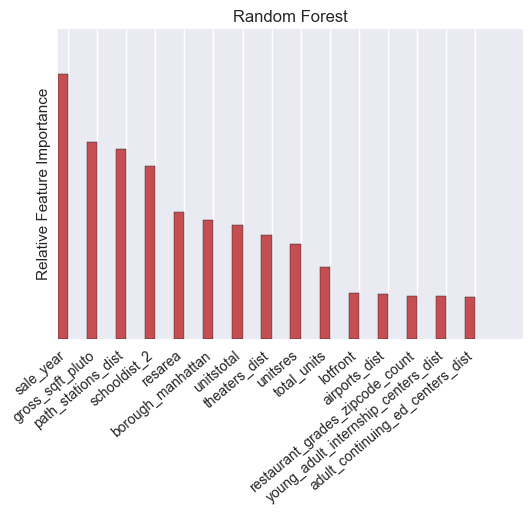

In [63]:
fig, ax = plt.subplots()
N = 15
ind = np.arange(N)
width = 0.35
feature_imps = [x[1] for x in feature_dct[0:N]]
feature_labels = (x[0] for x in feature_dct[0:N])
rects1 = ax.bar(ind, feature_imps, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Relative Feature Importance')
ax.set_title('Random Forest')
ax.set_xticks(ind + width)
ax.set_xticklabels(feature_labels, rotation = 40, ha = 'right')
ax.set_yticks([])

plt.show()